# Bangalore House Price Prediction

### Data Set Link:  https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data 

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (22,12)
import seaborn as sns
import sklearn
from sklearn import metrics

In [2]:
# Loading the dataset and stofing it into the dataframe df.
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Exploratory Data Analysis and Cleaning the Data.

In [3]:
# Checking Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
# Quick data description.
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.describe(include="object")

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


In [8]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
# Looking at number of null values.
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
# Checking the head of the dataframe.
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
#Initial Shape of the DataFrame.
df.shape

(13320, 9)

In [9]:
# Displaying the column names for the dataframe.
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [10]:
# Dropping non-essential columns from the dataframe and storing it in df1.
df1=df.drop(['society','availability','area_type','balcony'],axis = 'columns')
df1.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
# Checking Null values in the existing data in the dataframe.
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
# Since only very few NA values we are dropping those values from our data.
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
# Checking shape after dropping nulls.
df2.shape

(13246, 5)

In [14]:
# Checking Unique values in the size Column.
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
# Creating a new column 'BHK' by extracting essential information about BHK in the 'size' column.
df2['BHK']=df2['size'].apply(lambda x : int(x.split()[0]))

C:\Users\Avirup Saha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
# Head of the new dataframe.
df2.head(5)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
# Checking the unique values in the 'BHK' column.
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [18]:
df2[df2.BHK>10]

,location,size,total_sqft,bath,price,BHK
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


In [28]:
df2.total_sqft.unique()
# The array of unique values in the total_sqft column.

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [29]:
len(df2.total_sqft.unique())
# Number of unique values in the total_sqft column.

2067

In [30]:
# Functon for identifying proper float values and tacking with improper float values.
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [31]:
#Tackling those values that aren't a proper float type number i.e uncleaned data with values as range or different unit
#data, misentered data etc.
#Unstructured incoming data.

df2[~df2['total_sqft'].apply(is_float)].head(10)

# We see many range values in the output, so we have to replace these range values with their average in order to make them proper
#float type and also usable.

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [32]:
#Function that takes range value and returns the average of the range. This will be used in the total square_feet column in order
#Convert the range of square feets in the the average of the two.

def convert_sqft_to_num(x):
    tokens = x.split('-')   #Splitting on '-' character
    if len(tokens)==2: 
        return (float((float(tokens[0])+float(tokens[1]))/2))
    try:
        return float(x)
    except:
        return None

In [33]:
# Testing the Function - 1
convert_sqft_to_num('1156 - 2278') # We give range as an Input and get float as an output.

1717.0

In [34]:
# Testing the Function - 2
convert_sqft_to_num('1015 - 1510')

1262.5

In [35]:
#applying the function to the copy of the above dataframe denoted by df3. And then displayong it's head.
df3=df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [36]:
df3.sample(n=5)

,location,size,total_sqft,bath,price,BHK
6298,Sarjapur Road,3 BHK,1826.0,3.0,130.00,3
5555,Banashankari,2 BHK,1390.0,2.0,86.00,2
4833,Bannerghatta Road,2 BHK,1220.0,2.0,80.00,2
1901,7th Phase JP Nagar,3 BHK,1300.0,2.0,52.00,3
3405,Bannerghatta Road,3 BHK,1427.0,2.0,48.51,3


# Feature Engineering Begins

In [37]:
df3.head(5)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [119]:
#Price per squarefoot is a very important feature in real estate business. We have to remove outliers based on invalid Price per
#Square foot data. The Prices are in lakhs so multiplying by 100000 and rounding of to two decimal place.
df4=df3.copy()
df4['Price_Per_sqft'] = df4['price']*100000/df4['total_sqft']
df4['Price_Per_sqft'] = df4['Price_Per_sqft'].apply(lambda x: round(x,2))
df4.head(5)

,location,size,total_sqft,bath,price,BHK,Price_Per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [120]:
df4.rename(columns = {"price" : "Price_In_Lacs"}, inplace = True)

### Dealing with Dimensionality Curse

In [121]:
#Dimensionality Curse
len(df4.location.unique()) # Unique values of Location

1304

In [122]:
df4.location = df4.location.apply(lambda x : x.strip()) #Strips external spaces in the location data
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats
# We display in ascending order and find there are many locations in the very end having only single entries. We need to combine.
# them under one location name and deal with sparse data and reduce complexity.

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [123]:
#Any Location which has less than 10 houses call it other location.
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10
#1052 locations have less than 10 houses among 1293 entries in location. This is a huge amount and needs to be death with to
# increase efficiency of our model.

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [124]:
#Current Number of Unique entries
a = len(df4.location.unique())
print(a)

1293


In [125]:
#Unique entries after replacing the locations having less than 10 entries as Other Location
df4.location = df4.location.apply(lambda x : 'Other Location' if x in location_stats_less_than_10 else x)
b = len(df4.location.unique())
print(b)

242


In [126]:
# Number of locations combined under 'Other Location' Column
print(a - b)
# 1051 is a big number considering the total number 1293. These 1051 locations had only single entry values and had to be combined.

1051


In [127]:
 df4.head(10)

,location,size,total_sqft,bath,Price_In_Lacs,BHK,Price_Per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.86
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.06
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.82
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.24
9,Other Location,6 Bedroom,1020.0,6.0,370.00,6,36274.51


Outlier Reduction and Removal
Domain Knowledge = Typical square_foot per bedroom = 300(minimum) : will help in removal of outliers and unusual datapoints.

In [128]:
# Checking what all entries have less rhan 300 sqft per bedroom. 300 is our base limit.
df4[df4.total_sqft/df4.BHK < 300].head()

,location,size,total_sqft,bath,Price_In_Lacs,BHK,Price_Per_sqft
9,Other Location,6 Bedroom,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.30
70,Other Location,3 Bedroom,500.0,3.0,100.0,3,20000.00


These are erroneous data -
Eg 1. 1000sqft home with 6 bedrooms, 600sqft with 8 bedrooms, very unusual data. So needs to be removed.
Eg 2. 1407sqft home with 6 bedrooms, 500sqft with 3 bedrooms, very unusual data. So needs to be removed.

In [129]:
#Current Shape of our data frame.
df4.shape

(13246, 7)

In [130]:
#Creating a new dataframe df5 and removing all the unual data points which give erroneous data for sqft per bedroom.
df5 = df4[~(df4.total_sqft/df4.BHK < 300)]
df5.shape
#Shape after removal of certain erroneous datapoints.

(12502, 7)

In [131]:
#Total number of unusual datapoints removed
df4.shape[0] - df5.shape[0]

744

In [132]:
#Detecting anomalies based on price per squarefoot
df5.Price_Per_sqft.describe()

count     12456.000000
mean       6308.502836
std        4168.127366
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: Price_Per_sqft, dtype: float64

In [133]:
describe_df = df5.groupby('location').describe()
describe_df

total_sqft                                    \
                               count         mean          std     min   
location                                                                 
1st Block Jayanagar             10.0  1915.000000   667.549416  1000.0   
1st Phase JP Nagar              23.0  1800.695652   800.365169   840.0   
2nd Phase Judicial Layout       11.0  1173.272727   341.193227   525.0   
2nd Stage Nagarbhavi             9.0  2127.777778  1013.382674  1200.0   
5th Block Hbr Layout             7.0  2112.571429  1589.967175  1100.0   
...                              ...          ...          ...     ...   
Yelachenahalli                  17.0  1321.294118   375.409903   800.0   
Yelahanka                      205.0  1776.041463  2976.915456   567.0   
Yelahanka New Town              38.0  1215.526316   762.328252   350.0   
Yelenahalli                     13.0  1268.461538   190.068240  1056.0   
Yeshwanthpur                    80.0  1454.343750   616.906316   400.0   

                                                               bath            \
                               25%     50%      75%      max  count      mean   
location                                                                        
1st Block Jayanagar        1333.75  1817.5  2437.50   2850.0   10.0  3.100000   
1st Phase JP Nagar         1202.50  1590.0  2071.00   4550.0   24.0  2.958333   
2nd Phase Judicial Layout  1025.00  1300.0  1350.00   1681.0   11.0  2.090909   
2nd Stage Nagarbhavi       1350.00  1500.0  3000.00   4000.0    9.0  4.666667   
5th Block Hbr Layout       1203.00  1270.0  2456.00   5100.0    7.0  3.142857   
...                            ...     ...      ...      ...    ...       ...   
Yelachenahalli             1100.00  1200.0  1400.00   2400.0   17.0  2.058824   
Yelahanka                  1104.00  1327.0  1650.00  35000.0  205.0  2.458537   
Yelahanka New Town          650.00  1050.0  1584.50   4000.0   39.0  1.871795   
Yelenahalli                1160.00  1200.0  1260.00   1650.0   13.0  2.153846   
Yeshwanthpur               1161.75  1381.5  1825.25   3600.0   80.0  2.400000   

                           ...  BHK      Price_Per_sqft                \
                           ...  75%  max          count          mean   
location                   ...                                          
1st Block Jayanagar        ...  4.0  4.0           10.0  12359.253000   
1st Phase JP Nagar         ...  4.0  5.0           23.0   9726.405652   
2nd Phase Judicial Layout  ...  3.0  3.0           11.0   4048.701818   
2nd Stage Nagarbhavi       ...  5.0  6.0            9.0  14381.275556   
5th Block Hbr Layout       ...  4.5  6.0            7.0   6622.120000   
...                        ...  ...  ...            ...           ...   
Yelachenahalli             ...  3.0  4.0           17.0   6363.387059   
Yelahanka                  ...  3.0  6.0          205.0   5204.894634   
Yelahanka New Town         ...  3.0  4.0           38.0   5860.659474   
Yelenahalli                ...  2.0  3.0           13.0   4012.550769   
Yeshwanthpur               ...  3.0  6.0           80.0   6620.544250   

                                                                        \
                                   std      min         25%        50%   
location                                                                 
1st Block Jayanagar        3931.939541  6000.00  11100.4575  12258.570   
1st Phase JP Nagar         4802.127032  5274.73   7170.1350   8425.610   
2nd Phase Judicial Layout   674.731266  3500.00   3500.0000   3500.000   
2nd Stage Nagarbhavi       5272.435483  5666.67  14666.6700  15033.330   
5th Block Hbr Layout       4675.409036  3611.11   4503.5450   5259.150   
...                                ...      ...         ...        ...   
Yelachenahalli             2908.300573  3518.52   4986.4000   5454.550   
Yelahanka                  1746.406335   371.43   4298.6400   5029.660   
Yelahanka New Tow

Text(0, 0.5, 'Count')

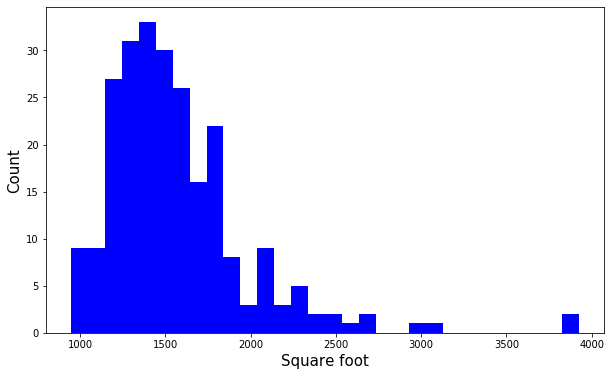

In [134]:
# Distribution of mean value of Total Sqft grouped by location.
plt.hist(describe_df['total_sqft']['mean'],bins = 30, color = 'blue' )
plt.xlabel('Square foot', size = 15)
plt.ylabel('Count', size = 15)
# Observation - Maximum flats are in the range of 1200 - 1400 sqft

Text(0, 0.5, 'Count')

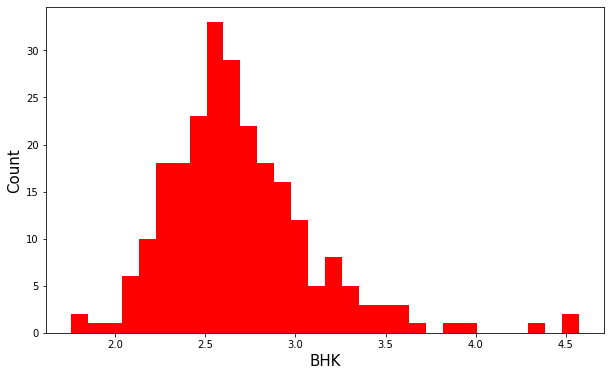

In [135]:
# Distribution of mean value of BHK grouped by location.
plt.hist(describe_df['BHK']['mean'],bins = 30, color = 'red' )
plt.xlabel('BHK', size = 15)
plt.ylabel('Count', size = 15)
# Observation - 2 to 3 BHK flats dominate the distribution.

Text(0, 0.5, 'Count')

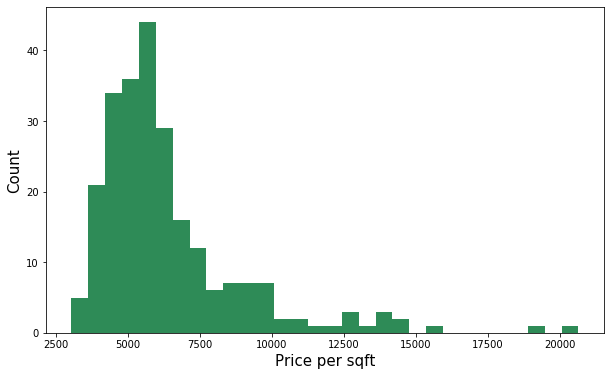

In [136]:
# Distribution of mean value of Price Per sqft grouped by location.
plt.hist(describe_df['Price_Per_sqft']['mean'],bins = 30, color = 'seagreen' )
plt.xlabel('Price per sqft', size = 15)
plt.ylabel('Count', size = 15)
# Observation - Average Price per square foot is in the range of Rs. 5000 to Rs. 6000.

Text(0, 0.5, 'Count')

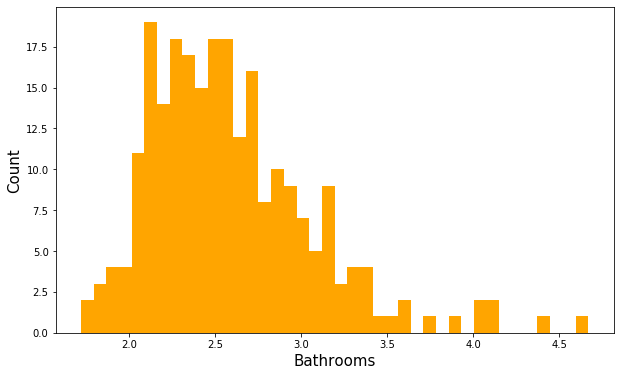

In [137]:
# Distribution of mean value of baths grouped by location.
plt.hist(describe_df['bath']['mean'],bins = 40, color = 'orange' )
plt.xlabel('Bathrooms', size = 15)
plt.ylabel('Count', size = 15)
# Observation - Maximum households have 2 to 3 bathrooms.

In [138]:
#Keeping only those data that lies within the Mean and one Standard Deviation on either side.
# These outliers has to be removed.
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.Price_Per_sqft)
        sd=np.std(subdf.Price_Per_sqft)
        reduced_df = subdf[(subdf.Price_Per_sqft>(m-sd)) & (subdf.Price_Per_sqft<=(m+sd))]
        df_out = pd.concat([df_out,reduced_df], ignore_index = True)
    return df_out
df6 = remove_pps_outlier(df5)
df6.shape #Displaying the Shape

(10241, 7)

In [139]:
#Outlier data removed, removing data beyond one standard deviation.
df5.shape[0] - df6.shape[0]

2261

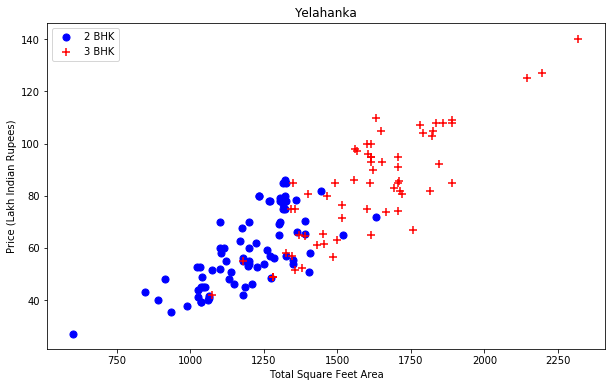

In [149]:
#Certain Data Points have same sqft 3BHK flats priced less than 2BHK flats. These are outliers and have to be removed.
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]  #Finding 2BHK flats
    bhk3 = df[(df.location==location) & (df.BHK==3)]  #Finding 3BHK flats
    matplotlib.rcParams['figure.figsize'] = (10,6)
    plt.scatter(bhk2.total_sqft,bhk2.Price_In_Lacs,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.Price_In_Lacs,marker='+', color='red',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Yelahanka") #Plotting the scatterplot for Yelahanka

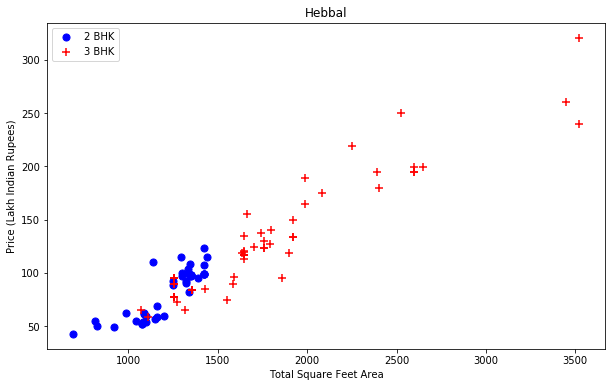

In [150]:
#Plotting the same for Hebbal
plot_scatter_chart(df6,"Hebbal")

#2BHK flat should have price lesser than 3BHK of same sqft.
#Filtering out all those values of say 2BHK whose price per squarefoot is less than 1BHK.

In [151]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_Per_sqft),
                'std': np.std(bhk_df.Price_Per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_Per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
#df8 = df7.copy()
df7.shape

(7329, 7)

In [152]:
#Total number of anomalies removes
df6.shape[0] - df7.shape[0]

2912

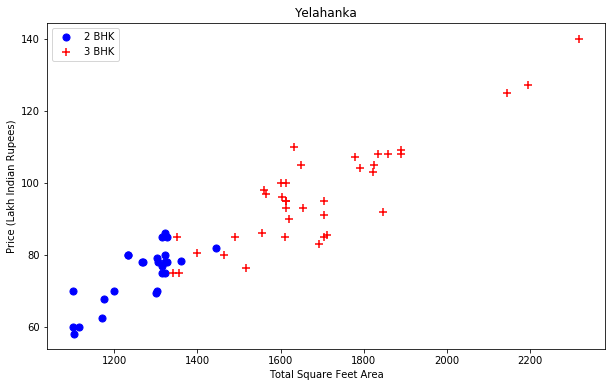

In [153]:
plot_scatter_chart(df7,"Yelahanka") #Plotting the scatterplot for Yelahanka

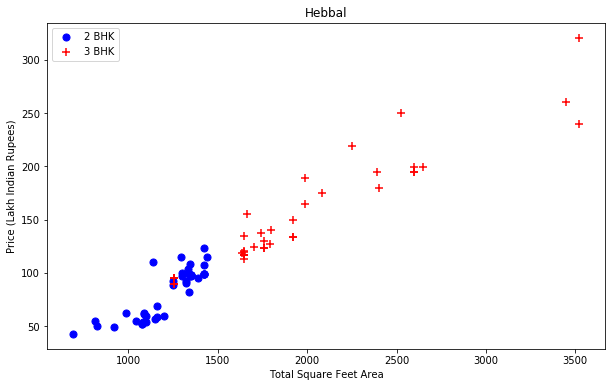

In [154]:
#Plotting the same for Hebbal
plot_scatter_chart(df7,"Hebbal")

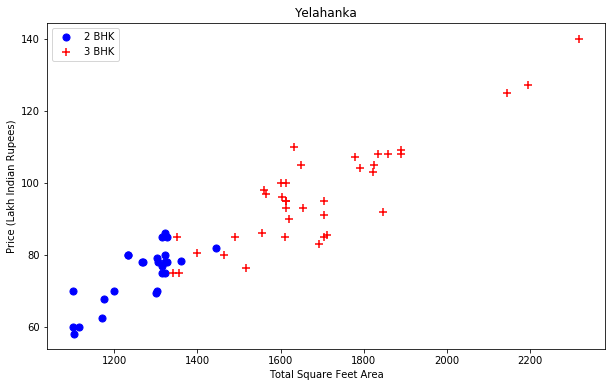

In [155]:
#Plotting the same for Yelahanka
plot_scatter_chart(df7,"Yelahanka")

Text(0, 0.5, 'Count')

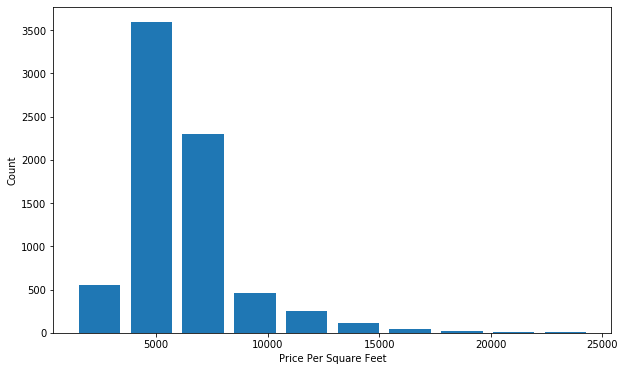

In [156]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,6)
plt.hist(df7.Price_Per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Removing bathroom specific outliers.

In [157]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [158]:
df7[df7['bath']>10]

,location,size,total_sqft,bath,Price_In_Lacs,BHK,Price_Per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.00
5925,Other Location,10 BHK,12000.0,12.0,525.0,10,4375.00
6014,Other Location,16 BHK,10000.0,16.0,550.0,16,5500.00
6747,Other Location,11 BHK,6000.0,12.0,150.0,11,2500.00
7078,Other Location,13 BHK,5425.0,13.0,275.0,13,5069.12


Text(0, 0.5, 'Count')

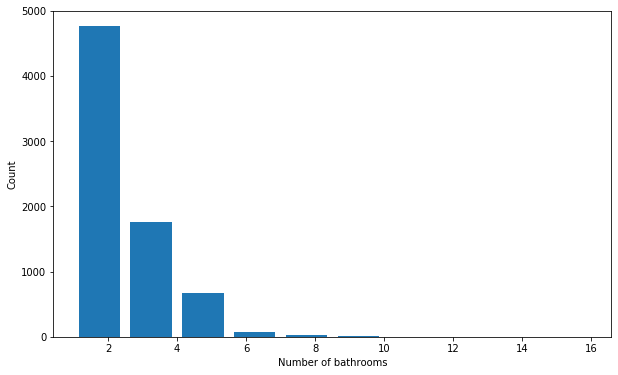

In [159]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [160]:
#Any time we have bathrooms greater than bedroom+2 remove those outliers.
df7[df7.bath>df7.BHK+2]
# Eg. 4Bedrom 7 bathroms... outlier. unusual

,location,size,total_sqft,bath,Price_In_Lacs,BHK,Price_Per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.57
5850,Other Location,6 BHK,11338.0,9.0,1000.0,6,8819.90
9012,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03


In [161]:
df8 = df7[df7.bath<df7.BHK+2]
df8.shape

(7251, 7)

In [162]:
#Dropping other unnecessary features for model. Remain only with location, total_sqft, bath, price and BHK.
df10 = df8.drop(['size','Price_Per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,Price_In_Lacs,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [163]:
#Location is a categorical column, need to convert it to a numerical using one hot encoding ---> dummies.
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
# Getting rid of the dummy variabe trap. Dropping the categorical column for 'Other Location' type.
df11 = pd.concat([df10,dummies.drop('Other Location',axis ='columns')],axis ='columns')
df11.head(3)

,location,total_sqft,bath,Price_In_Lacs,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
#Replaced location by one hot encoding. Now we can drop location column now.
df12 = df11.drop('location',axis= 'columns')
df12.head(3)

,total_sqft,bath,Price_In_Lacs,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
#Checking shape of X.
df12.shape

(7251, 245)

In [177]:
# X is our independent variables. Price is what we want to predict based on total_sqft, bath and BHK.
X = df12.drop(['Price_In_Lacs'],axis='columns')
X.head(3)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
# Shape of Independent feature dataframe
X.shape

(7251, 244)

In [179]:
# y is our dependent variables. Dependent on location, total_sqft, BHK and bath.
y = df12.Price_In_Lacs
y.head(5)

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: Price_In_Lacs, dtype: float64

In [180]:
# Checking length of y.
len(y)

7251

Training and Testing the Model

In [205]:
# Splitting our dataset in training and testing dataset using sklearn's train_test_split method.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [206]:
# Importing sklearn's Linear Regression model and fitting and training the model. Testing the same model and displaying the score.
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)
y_predict = lr_clf.predict(X_test)

In [207]:
# Getting the coefficient of the Linear regression model
lr_clf.coef_

array([ 8.69726311e-02,  1.48079475e+00, -3.16412285e+00,  1.19742870e+02,
        2.79411030e+00, -5.22545771e+01,  1.08759260e+02, -7.10284423e+01,
       -3.90319572e+01, -1.93344565e+01, -1.78068771e+01, -4.67895582e+01,
       -4.68361136e+01, -3.53568326e+01, -4.97540115e+01, -4.23737564e+01,
       -2.83461373e+01, -2.99568207e+01, -3.34351001e+01, -4.22261282e+01,
       -4.46222812e+01, -3.33249897e+01, -4.86763706e+01, -4.39394292e+01,
       -3.32766201e+01, -3.36420381e+01, -2.02577571e+01,  4.51677700e+00,
       -4.05423862e+01, -5.17081892e+01, -2.97593202e+01, -1.60438505e+01,
       -3.26957837e+01,  8.29794874e+01, -3.34366239e+01, -6.02007482e+01,
       -6.32962389e+01, -2.91809953e+01, -3.27421981e+01, -1.35349435e+01,
       -3.17144626e+01,  2.88893861e+01, -3.19851871e+00, -4.96634270e+01,
       -4.43530569e+01, -5.55490260e+01, -3.31503757e+01,  1.15984312e+02,
       -4.64160886e+01, -3.13436804e+01, -2.37033577e+01, -2.06969736e-01,
       -3.63564392e+01, -

[Text(0, 0.5, 'Predicted_Prices_In_lacs'),
 Text(0.5, 0, 'Actual Prices_IN_Lacs')]

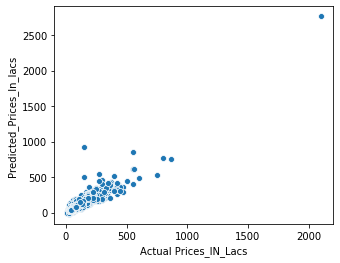

In [201]:
plt.figure(figsize=(5,4))
fig = sns.scatterplot(y_test, y_predict)
fig.set(xlabel = "Actual Prices_IN_Lacs", ylabel = "Predicted_Prices_In_lacs")

In [208]:
# Calculating mean squared error
sklearn.metrics.mean_squared_error(y_test,y_predict)

1022.3560442056988

Text(0.5, 1.0, 'residual plot')

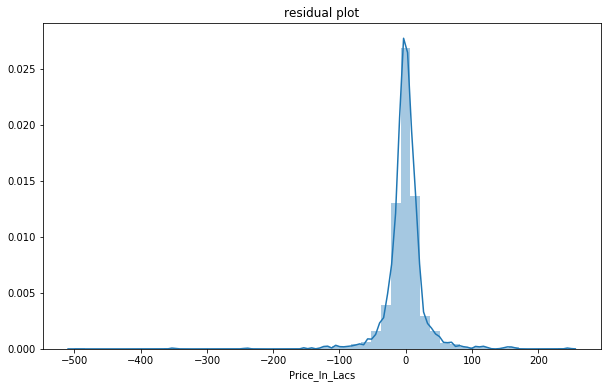

In [213]:
plt.figure(figsize = (10,6))
residual_p = (y_test - y_predict)
sns.distplot(residual_p).set_title("residual plot")

In [204]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85430675, 0.84187647, 0.84728412, 0.85171729, 0.87168018])

 **Identifying the best Model. Comapring Linear Regression and DT Regressor.**

In [176]:
# Best Model Selection using GridSearch CV

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'Linear Regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse'],
                'splitter': ['best']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'Model': algo_name,
            'Best_score': gs.best_score_,
            'Best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['Model','Best_score','Params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Avirup Saha\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\Avirup Saha\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipel

,Model,Best_score,Best_params
0,Linear Regression,0.853373,{'normalize': False}
1,Decision Tree,0.683332,"{'criterion': 'mse', 'splitter': 'best'}"


In [188]:
# Predict price function that predicts flat price based on location, sqft, bath and bhk using our model's prediction.
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    val = lr_clf.predict([x])[0]
    return val

In [189]:
# Final Dataframe
df12.head(5)

,total_sqft,bath,Price_In_Lacs,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Predicting some flat values - based on location, sqft, BHK and Bathrooms.**

In [190]:
print(round(predict_price('1st Phase JP Nagar',1000, 2, 2),2),'Lakhs')

82.82 Lakhs


C:\Users\Avirup Saha\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [110]:
print(round(predict_price('1st Phase JP Nagar',2000, 3, 3),2),'Lakhs')

168.11 Lakhs


C:\Users\Avirup Saha\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [111]:
print(round(predict_price('Whitefield',2000, 3, 3),2),'Lakhs')

135.29 Lakhs


C:\Users\Avirup Saha\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [113]:
print(round(predict_price('Whitefield',2500, 3, 3),2),'Lakhs')

178.78 Lakhs


C:\Users\Avirup Saha\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [88]:
print(round(predict_price('5th Block Hbr Layout',8000, 6, 4),2),'Lakhs')

617.4 Lakhs


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [89]:
print(round(predict_price('5th Block Hbr Layout',3500, 4, 3),2),'Lakhs')

226.23 Lakhs


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [90]:
print(round(predict_price('Varthur',1600, 3, 2),2),'Lakhs')

91.8 Lakhs


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [91]:
print(round(predict_price('Vishveshwarya Layout',2000, 3, 3),2),'Lakhs')

98.39 Lakhs


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


**Conclusion**